In [11]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from parallel_two_qubit_gate_decomposition import *
from NuOp.gates_numpy import cnot_gate, fsim_gate, cphase_gate, xy_gate, get_gate_unitary_qiskit, iswap, fsim
from itertools import product
from qiskit.transpiler import PassManager
#test

## Decomposition example with a single two-qubit gate 

In [38]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
# fid_2q = {(0,1):[1]}
fid_2q = dict.fromkeys([(i,j) for i,j in product(range(qc.num_qubits), repeat=2) if i!=j], [1])
params = [[1/2]]
gate_labels = ['$iSwap^{1/2}$']
gate_defs = [iswap]
pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.000001)
# pm = PassManager([pgrp, re])
pm = PassManager([pgrp])
circ_trans = pm.run(qc)
# print(re.property_set)
circ_trans.draw(output='mpl')

In [2]:
# CNOT gate in the circuit
my_op = np.matrix([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,0,1],
                   [0,0,1,0]])

In [3]:
test_circuit = QuantumCircuit(2)
test_circuit.unitary(my_op, [0,1])

In [4]:
test_circuit = QuantumCircuit(2)
test_circuit.cx(0,1)

In [6]:
# Assume the HW supports the Google SYC gate. This is an underlying fsim_gate. 
# So we pass the fsim_gate function in the gate_defs,
# we pass the desired SYC parameters (theta=pi/2, phi=pi/6) in the params, we pass a label for circuit drawing, 
# and we pass the calibration fidelity of this gate on qubits 0 and 1

# fid_2q = {(0,1): [0.995]} 
fid_2q = {(0,1):[1]}
# params = [[np.pi/2, np.pi/6]]
params = [[1/2]]
gate_labels = ['$iSwap^{1/2}$']
# gate_defs = [fsim_gate]
gate_defs = [iswap]

# All these inputs get passed to the gate decomposition pass. 
# Ignore the [1 to 54] loop (that was from our assumption of Sycamore hardware, but I believe it no longer plays a role)
# tolerance defines the fidelity accuracy we want from the decomposition. If you set the tol=0.1 or so, you can see that 
# lesser two-qubit gates are used.

pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0)
approx_cz = pgrp.run(test_circuit)

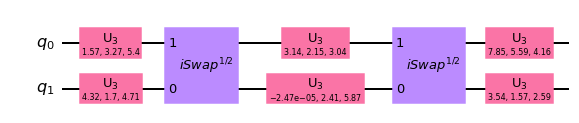

In [7]:
approx_cz.draw(output='mpl')

## Decomposition example with two circuit gates with two hardware gates

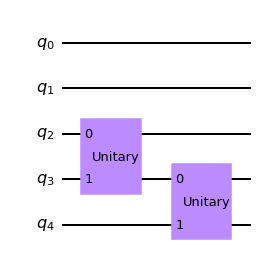

In [8]:
test_circuit = QuantumCircuit(5)
test_circuit.unitary(my_op, [2,3])
test_circuit.unitary(my_op, [3,4])
test_circuit.draw(output='mpl')

In [11]:
# fid_2q = {(2,3): [0.94, #CZ fidelity
#                   0.99],#XY fidelity
#           (3,4): [0.93, #CZ
#                   0.96]}#XY
# params = [[np.pi], 
#           [np.pi]]
# gate_labels = ['CZ', 
#                'XY']
# gate_defs = [cphase_gate, 
#              xy_gate]
# pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.00000001)
# approx = pgrp.run(test_circuit)

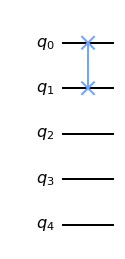

In [28]:
test_circuit = QuantumCircuit(5)
test_circuit.swap(0,1)
test_circuit.draw(output='mpl')

In [37]:
fid_2q = {(2,3): [1, 1],
          (3,4): [1,1],
          (0,4): [1,1],
          (0,1): [1,1]}
params = [[1/2], 
          [1/2]]
gate_labels = ['iSwap^1/2$', 
               'iSwap^1/2$']
gate_defs = [iswap, 
             iswap]
pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.0)
approx = pgrp.run(test_circuit)

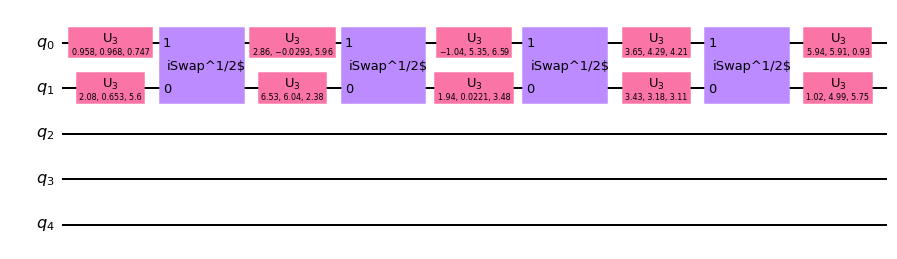

In [38]:
approx.draw(output='mpl')

In [39]:
fid_2q = {(2,3): [1, 1],
          (3,4): [1,1],
          (0,4): [1,1],
          (0,1): [1,1]}
params = [[1], 
          [1]]
gate_labels = ['iSwap^1$', 
               'iSwap^1$']
gate_defs = [iswap, 
             iswap]
pgrp = ParallelGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.0)
approx = pgrp.run(test_circuit)

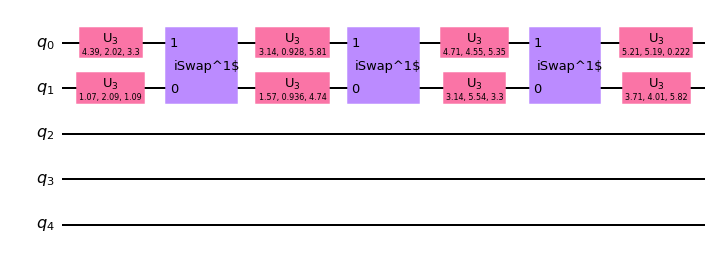

In [41]:
approx.draw(output='mpl')

## Multi-qubit unitary example

In [118]:
# from parallel_multi_qubit_gate_decomposition import *

In [119]:
# test_circuit = QuantumCircuit(4)
# my_op = np.kron(fsim_gate(np.pi/2, np.pi/6), fsim_gate(np.pi/3, np.pi/6)) #creating a test unitary by multiplying two fsim gates
# test_circuit.unitary(my_op, [0,1,2,3])

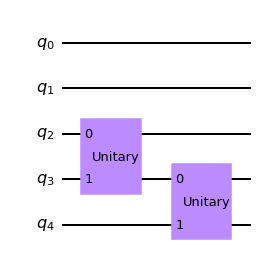

In [120]:
test_circuit.draw(output='mpl')

In [121]:
# fid_2q = {(0,1): [0.99, 0.99],
#           (1,2): [0.99, 0.99],
#           (2,3): [0.94, #CZ fidelity
#                   0.99],#XY fidelity
#           (3,4): [0.93, #CZ
#                   0.96]}#XY
# params = [[np.pi], 
#           [np.pi]]
# gate_labels = ['CZ', 
#                'XY']
# gate_defs = [cphase_gate, 
#              xy_gate]
# pgrp = MultiQubitGateReplacementPass(gate_defs, params, gate_labels,fid_2q, [1 for _ in range(54)], tol=0.0001)
# approx = pgrp.run(test_circuit)

In [122]:
# approx.draw()